Importing the necessary libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/PrimeTrade.ai/fear_greed_index.csv')

In [4]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
df1['date'] = pd.to_datetime(df1['date'])

In [6]:
df1.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [7]:
df1.duplicated().sum()

np.int64(0)

In [8]:
df2 = pd.read_csv('/content/drive/MyDrive/PrimeTrade.ai/historical_data.csv')

In [9]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format = 'mixed')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [12]:
df2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [13]:
df2.duplicated().sum()

np.int64(0)

In [14]:
df2.drop(columns=['Transaction Hash', 'Trade ID'], axis = 1, inplace = True)

In [15]:
df2['date'] = df2['Timestamp IST'].dt.date

In [16]:
df1['date'] = df1['date'].dt.date
df = pd.merge(df1, df2, on='date', how='inner')
df.head()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Timestamp
0,1672896600,29,Fear,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,2023-01-05 01:06:00,0.0000,Open Long,0.0,173271100,True,0.000000,1.680000e+12
1,1672896600,29,Fear,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,2023-01-05 01:06:00,0.0967,Open Long,0.0,173271100,True,0.000000,1.680000e+12
2,1672896600,29,Fear,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,2023-01-05 01:06:00,0.1791,Open Long,0.0,173271100,True,0.000000,1.680000e+12
3,1683869400,49,Neutral,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,2023-05-12 03:11:00,0.0000,Open Long,0.0,4064960965,True,0.275027,1.700000e+12
4,1683869400,49,Neutral,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,2023-05-12 03:11:00,0.4933,Open Long,0.0,4064960965,True,0.483987,1.700000e+12


In [17]:
df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0


In [18]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [19]:
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

Net Position after trade

In [20]:
df['Net Position'] = df['Start Position'] + df['Size Tokens']

Profitability

In [21]:
df['Profitability'] = (df['Closed PnL']>0).astype(int)

Trade Direction

In [22]:
df['Is Buy'] = (df['Side'].str.upper() == 'BUY').astype(int)
df['Is Sell'] = (df['Side'].str.upper() == 'SELL').astype(int)

Trade Size Buckets

In [23]:
df['Size Category'] = pd.cut(df['Size USD'], bins=[0, 100, 1000, 10000, np.inf], labels=['Small', 'Medium', 'Large', 'Whale'])

Trade Day Volatility

In [24]:
volatility_df = df.groupby('date')['Execution Price'].std().reset_index()
volatility_df.columns = ['date', 'Daily Price Volatility']
df = df.merge(volatility_df, on='date', how='left')

Cumulative Daily Metrics

In [25]:
daily_metrics = df.groupby(['date', 'Account']).agg({
    'Closed PnL': 'sum',
    'Profitability': 'mean',
    'Fee': 'sum',
    'Size USD': 'sum'
}).reset_index().rename(columns={
    'Closed PnL': 'Daily PnL',
    'Profitability': 'Daily Win Rate',
    'Fee': 'Total Fees',
    'Size USD': 'Daily Volume USD'
})

In [26]:
df[['date', 'Account', 'Side', 'Size USD', 'Closed PnL', 'Profitability',
           'Net Position', 'Size Category', 'Daily Price Volatility']].head()

,date,Account,Side,Size USD,Closed PnL,Profitability,Net Position,Size Category,Daily Price Volatility
0,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,BUY,183.53,0.0,0,0.0967,Medium,0.404145
1,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,BUY,156.39,0.0,0,0.1791,Medium,0.404145
2,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,BUY,137.08,0.0,0,0.2513,Medium,0.404145
3,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BUY,1100.11,0.0,0,0.4933,Large,17477.946554
4,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BUY,1935.95,0.0,0,1.3614,Large,17477.946554


# Inferences

Net Position Movement per account

In [27]:
net_position_df = df.groupby(['date', 'Account']).agg(Net_Position_Start=('Start Position', 'first'), Net_Position_End=('Net Position', 'last')).reset_index()
net_position_df['Net_Position_Change'] = net_position_df['Net_Position_End'] - net_position_df['Net_Position_Start']

Dailt Profit/Loss per account

In [28]:
daily_pnl_df = df.groupby(['date', 'Account']).agg(Daily_PnL=('Closed PnL', 'sum')).reset_index()

Avg Trade Size and Count per sentiment

In [29]:
trade_size_sentiment_df = df.groupby('classification').agg(Average_Trade_Size_USD=('Size USD', 'mean'), Trade_Count=('Size USD', 'count')).reset_index()

Buy/ Sell Ratio under each sentiment class

In [30]:
buy_sell_df = df.groupby('classification')['Side'].value_counts().unstack().fillna(0)
buy_sell_df['Buy/Sell Ratio'] = buy_sell_df['BUY'] / buy_sell_df['SELL'].replace(0, np.nan)

Win Rate %

In [31]:
win_rate_df = df.groupby('classification').agg(Win_Rate=('Profitability', 'mean')).reset_index()

In [32]:
net_position_df.head(), daily_pnl_df.head(), trade_size_sentiment_df, buy_sell_df, win_rate_df

(         date                                     Account  Net_Position_Start  \
 0  2023-01-05  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891             0.00000   
 1  2023-05-12  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23             0.00000   
 2  2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23            -0.59711   
 3  2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23         -3558.00000   
 4  2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23             0.00000   
 
    Net_Position_End  Net_Position_Change  
 0           0.25130              0.25130  
 1           0.56711              0.56711  
 2        -916.00000           -915.40289  
 3           0.00000           3558.00000  
 4       39897.00000          39897.00000  ,
          date                                     Account   Daily_PnL
 0  2023-01-05  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    0.000000
 1  2023-05-12  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    0.000000
 2  2023-12-14  0xb1231a4a2d

# EDA

/tmp/ipython-input-35-1615739788.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=df, estimator='sum', ci=None)


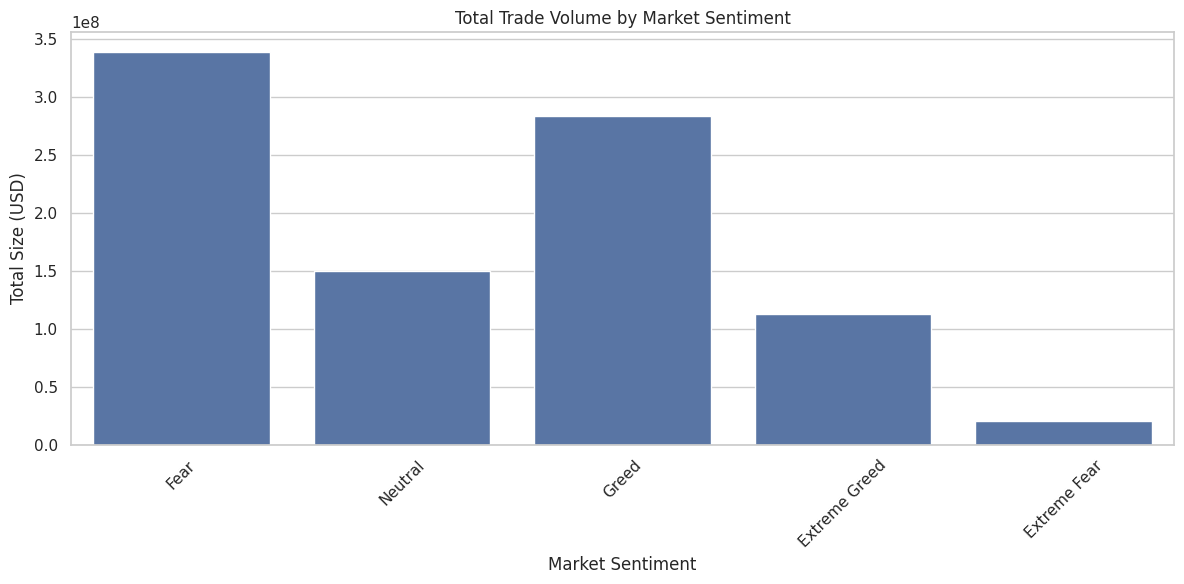

/tmp/ipython-input-35-1615739788.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=df, estimator='mean', ci='sd')


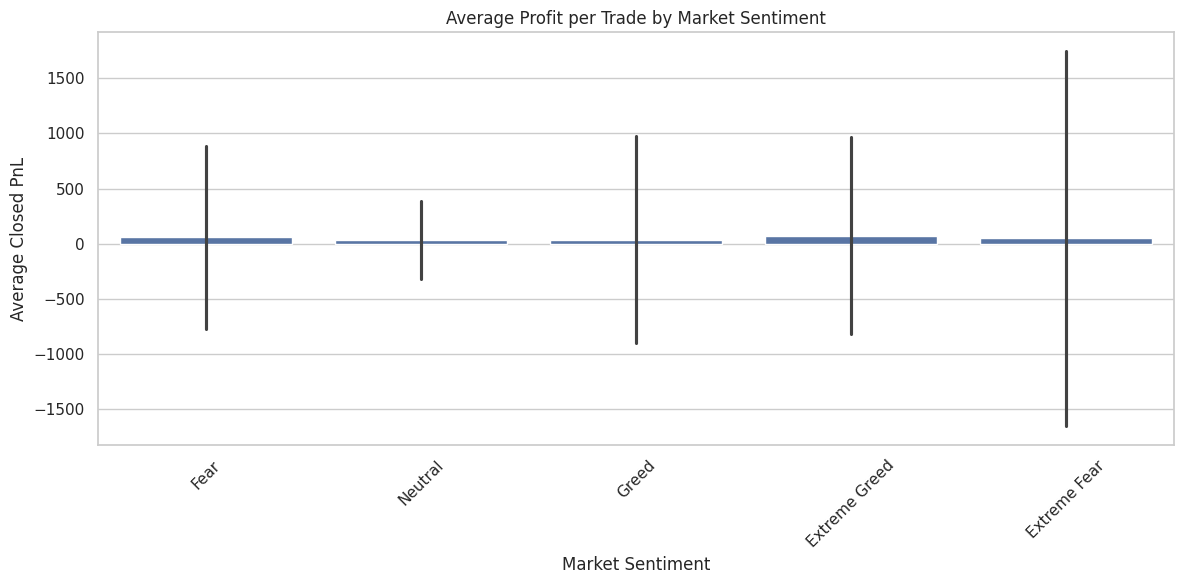

/tmp/ipython-input-35-1615739788.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='classification', y='Profitability', data=df, estimator='mean', ci=None)


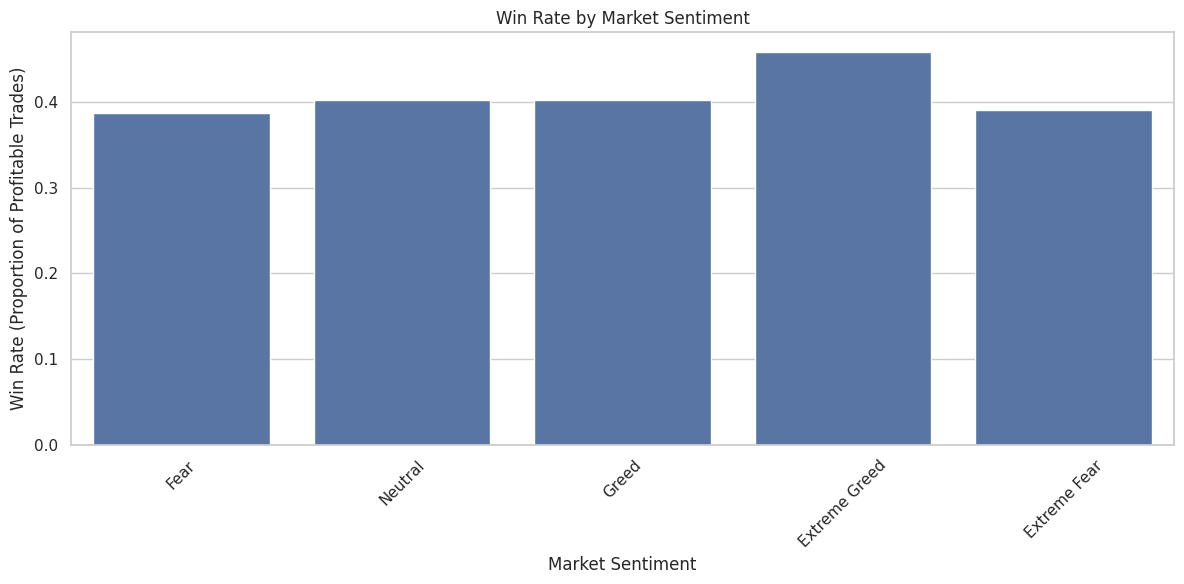

/tmp/ipython-input-35-1615739788.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='classification', y='Fee', data=df, estimator='mean', ci='sd')


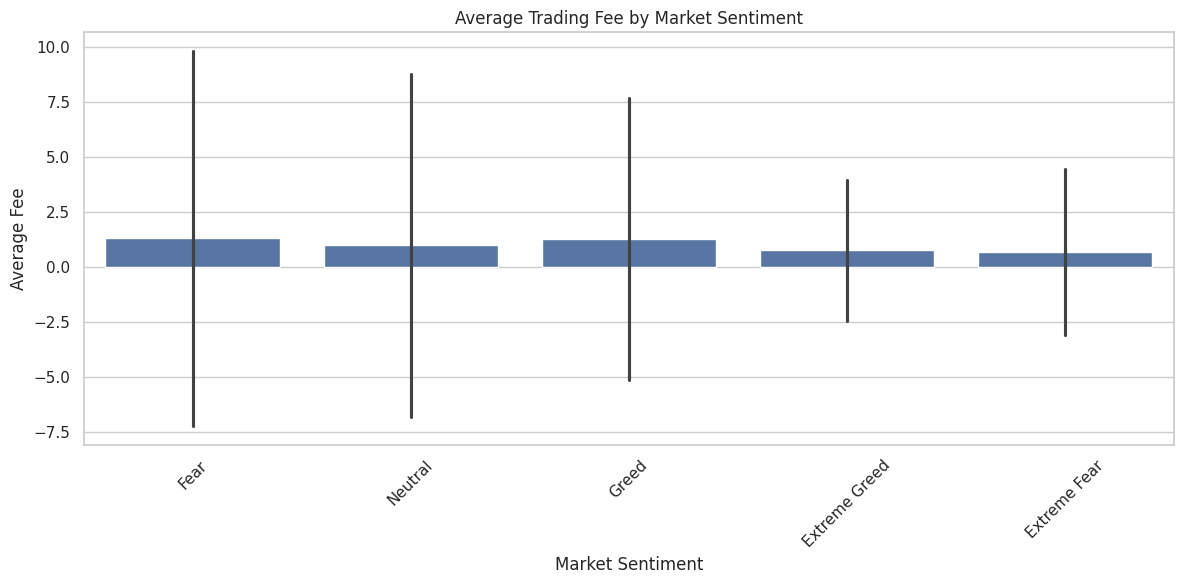

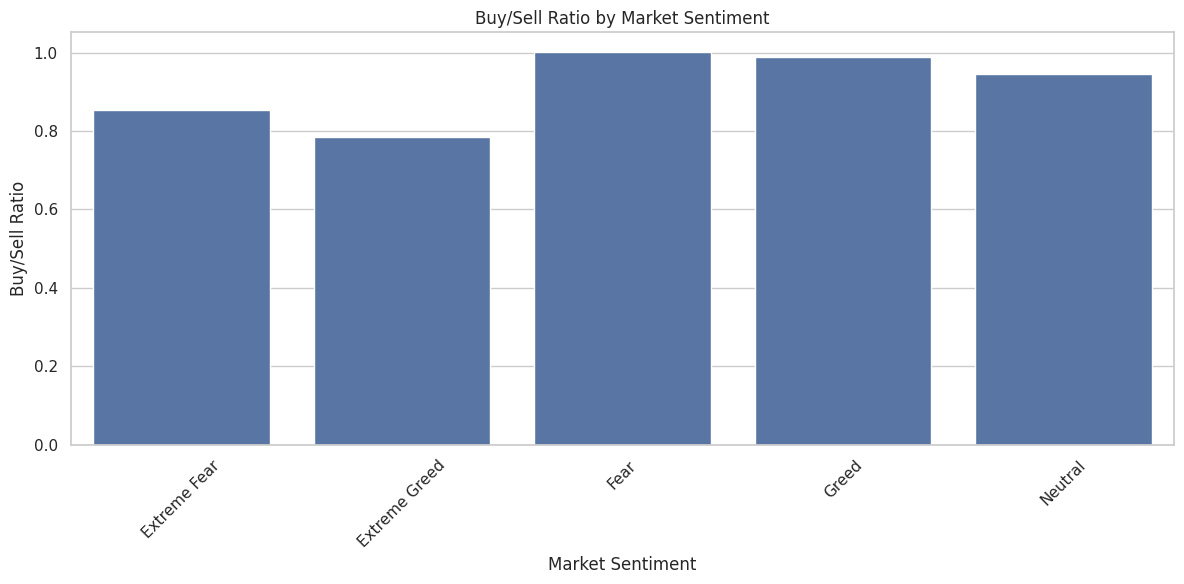

In [35]:
# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Plot 1: Total Trade Volume by Sentiment
plt.figure()
sns.barplot(x='classification', y='Size USD', data=df, estimator='sum', ci=None)
plt.title("Total Trade Volume by Market Sentiment")
plt.ylabel("Total Size (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average Profit (PnL) by Sentiment
plt.figure()
sns.barplot(x='classification', y='Closed PnL', data=df, estimator='mean', ci='sd')
plt.title("Average Profit per Trade by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Win Rate by Sentiment
plt.figure()
sns.barplot(x='classification', y='Profitability', data=df, estimator='mean', ci=None)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (Proportion of Profitable Trades)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 4: Average Fee by Sentiment
plt.figure()
sns.barplot(x='classification', y='Fee', data=df, estimator='mean', ci='sd')
plt.title("Average Trading Fee by Market Sentiment")
plt.ylabel("Average Fee")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 5: Buy/Sell Ratio by Sentiment
buy_sell_counts = df.groupby(['classification', 'Side']).size().unstack(fill_value=0)
buy_sell_counts['Buy/Sell Ratio'] = buy_sell_counts['BUY'] / buy_sell_counts['SELL'].replace(0, np.nan)

plt.figure()
sns.barplot(x=buy_sell_counts.index, y=buy_sell_counts['Buy/Sell Ratio'].values)
plt.title("Buy/Sell Ratio by Market Sentiment")
plt.ylabel("Buy/Sell Ratio")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


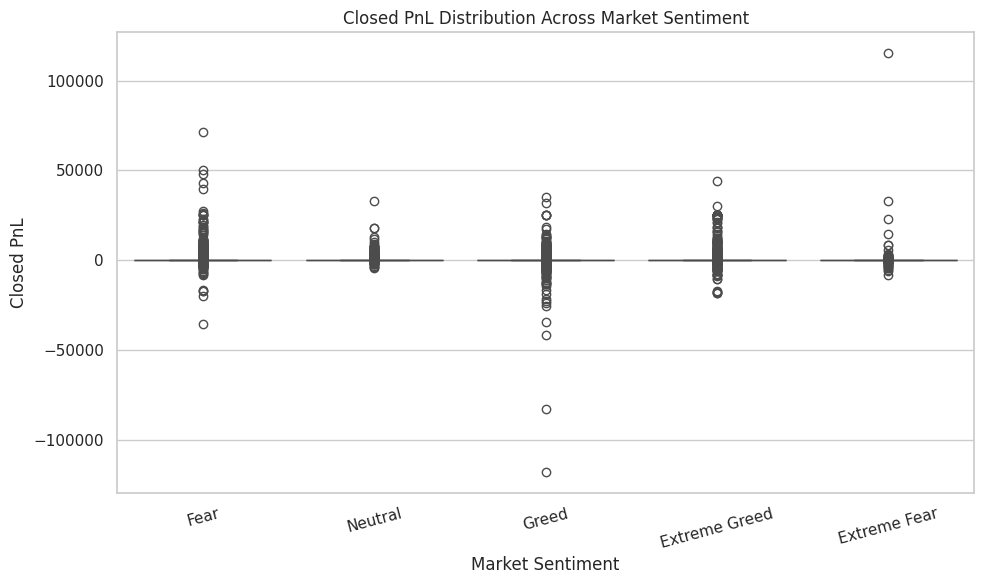

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title('Closed PnL Distribution Across Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

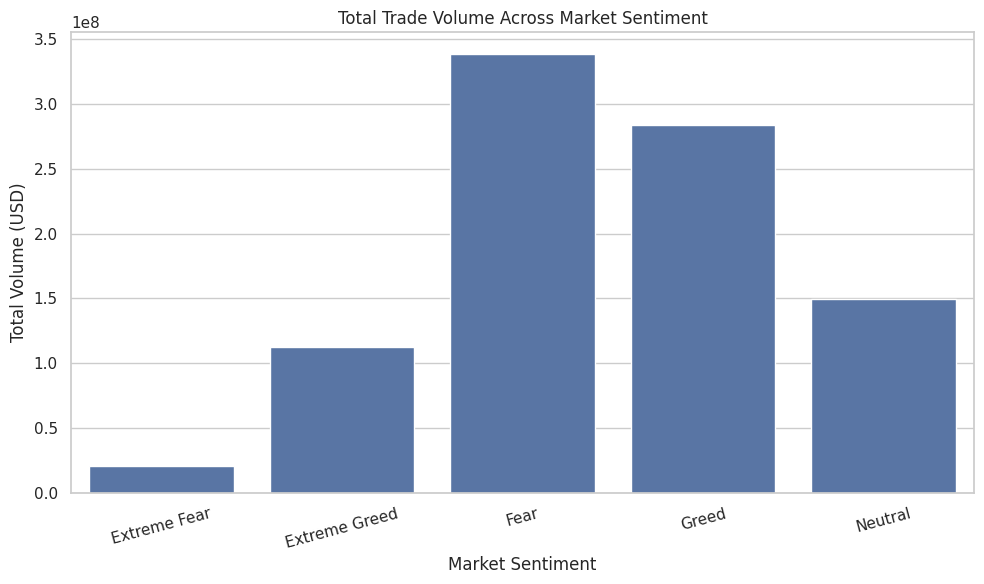

In [38]:
volume_df = df.groupby('classification')['Size USD'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Size USD', data=volume_df)
plt.title('Total Trade Volume Across Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

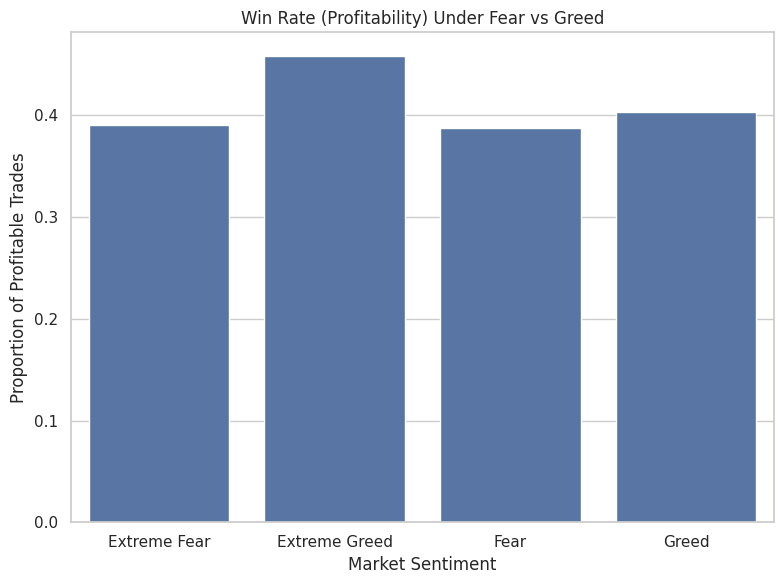

In [40]:
filtered_df = df[df['classification'].str.contains("Fear|Greed")]

winrate_df = filtered_df.groupby('classification')['Profitability'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='classification', y='Profitability', data=winrate_df)
plt.title('Win Rate (Profitability) Under Fear vs Greed')
plt.ylabel('Proportion of Profitable Trades')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()

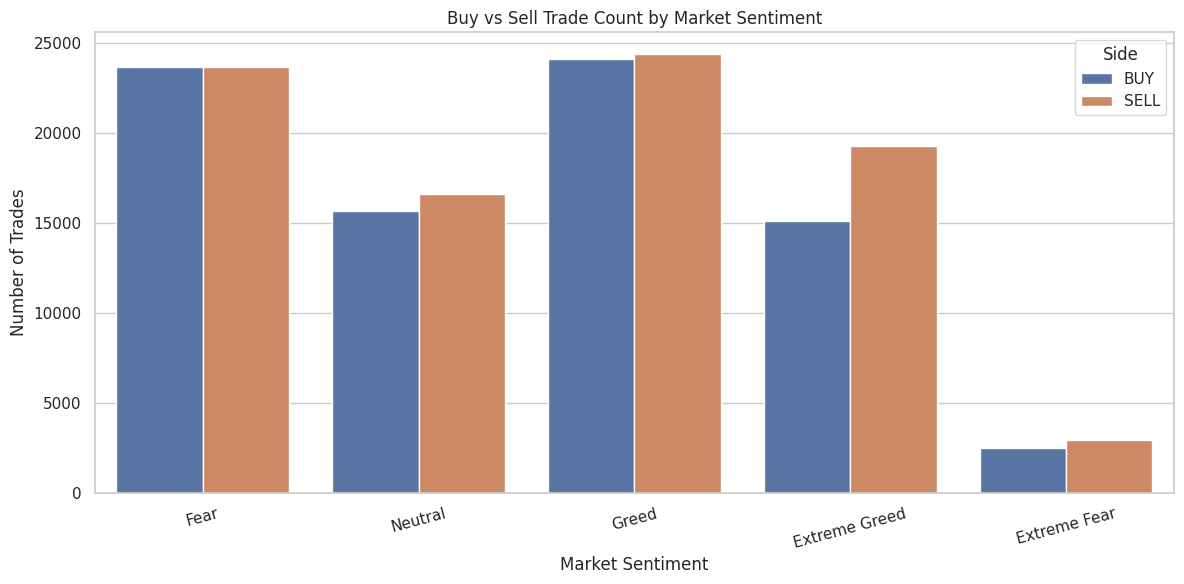

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='classification', hue='Side')
plt.title('Buy vs Sell Trade Count by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

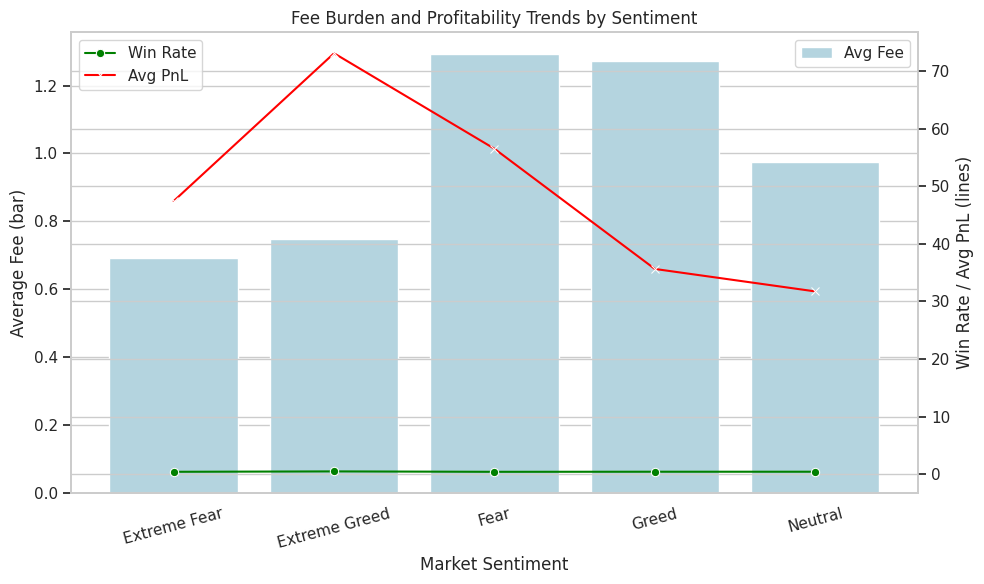

In [42]:
fee_profit_df = df.groupby('classification').agg({
    'Fee': 'mean',
    'Profitability': 'mean',
    'Closed PnL': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
sns.barplot(x='classification', y='Fee', data=fee_profit_df, ax=ax1, color='lightblue', label='Avg Fee')
sns.lineplot(x='classification', y='Profitability', data=fee_profit_df, ax=ax2, color='green', marker='o', label='Win Rate')
sns.lineplot(x='classification', y='Closed PnL', data=fee_profit_df, ax=ax2, color='red', marker='x', label='Avg PnL')

ax1.set_ylabel('Average Fee (bar)')
ax2.set_ylabel('Win Rate / Avg PnL (lines)')
ax1.set_xlabel('Market Sentiment')
plt.title('Fee Burden and Profitability Trends by Sentiment')
ax1.tick_params(axis='x', rotation=15)

fig.tight_layout()
plt.legend(loc='upper left')
plt.show()


Statistical Analysis

In [44]:
from scipy.stats import pearsonr

# Metrics to correlate with sentiment value
metrics = ['Size USD', 'Closed PnL', 'Fee', 'Profitability']

print("Correlation with Sentiment Score (value):\n")
for metric in metrics:
    corr, pval = pearsonr(df['value'], df[metric])
    print(f"{metric:<15}: Correlation = {corr:.4f}, p-value = {pval:.4e}")

Correlation with Sentiment Score (value):

Size USD       : Correlation = -0.0253, p-value = 3.2487e-25
Closed PnL     : Correlation = 0.0045, p-value = 6.6527e-02
Fee            : Correlation = -0.0143, p-value = 5.0181e-09
Profitability  : Correlation = 0.0420, p-value = 1.5468e-66


In [45]:
from scipy.stats import ttest_ind

greed_pnl = df[df['classification'].str.contains("Greed")]['Closed PnL']
fear_pnl = df[df['classification'].str.contains("Fear")]['Closed PnL']

t_stat, p_value = ttest_ind(greed_pnl, fear_pnl, equal_var=False)

print("\n T-Test: Closed PnL in Greed vs Fear")
print(f"T-statistic = {t_stat:.4f}")
print(f"p-value     = {p_value:.4e}")

if p_value < 0.05:
    print(" Statistically significant difference in PnL between Greed and Fear.")
else:
    print(" No statistically significant difference in PnL between Greed and Fear.")



 T-Test: Closed PnL in Greed vs Fear
T-statistic = -0.8381
p-value     = 4.0196e-01
 No statistically significant difference in PnL between Greed and Fear.


In [46]:
fear_profit = df[df['classification'].str.contains("Fear")]['Profitability']
greed_profit = df[df['classification'].str.contains("Greed")]['Profitability']

t_stat_wr, p_value_wr = ttest_ind(greed_profit, fear_profit, equal_var=False)

print("\n T-Test: Win Rate in Greed vs Fear")
print(f"T-statistic = {t_stat_wr:.4f}")
print(f"p-value     = {p_value_wr:.4e}")



 T-Test: Win Rate in Greed vs Fear
T-statistic = 13.9217
p-value     = 5.0847e-44


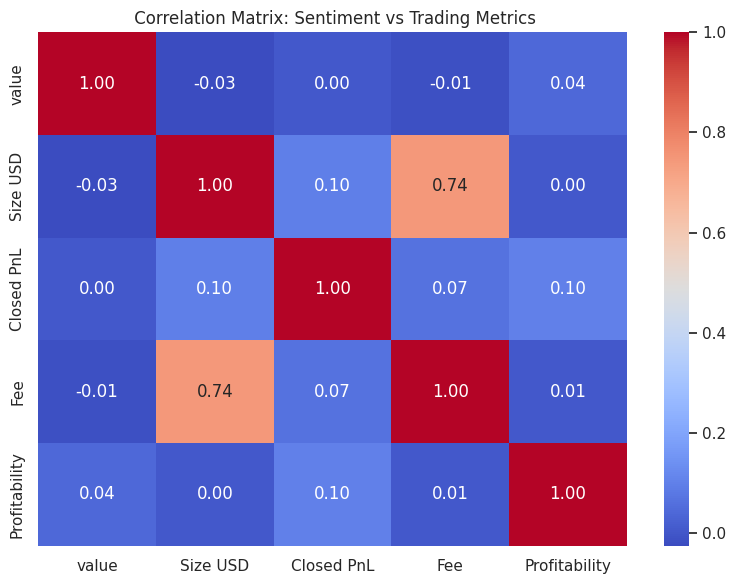

In [47]:
numeric_df = df[['value', 'Size USD', 'Closed PnL', 'Fee', 'Profitability']].dropna()

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Correlation Matrix: Sentiment vs Trading Metrics")
plt.tight_layout()
plt.show()